# Chapter7 합성곱 신경망(CNN)


## 7.1 전체 구조

- CNN에서는 합성곱 계층(convolutional layer)과 풀링 계층(pooling layer)이란 새로운 계층을 사용한다
---
- 완전연결 계층(Affine 계층)으로 이뤄진 네트워크
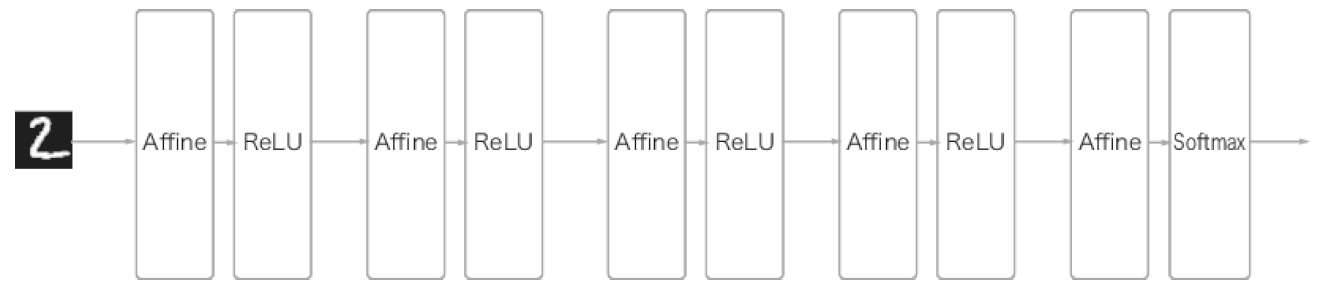

  ㄴ Affine계층과 활성화함수가 한쌍을 이루어 한 층을 이룬다

  <br/>

- CNN으로 이루어진 네트워크(합성곱 계층과 풀링 계층이 추가됨)
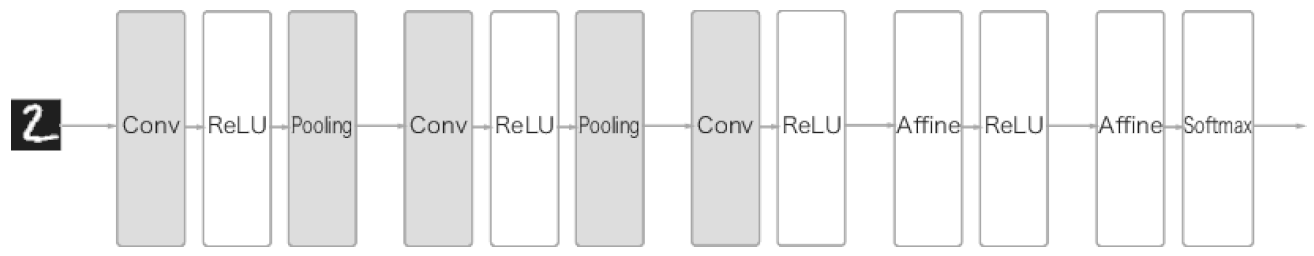

  ㄴ CNN은 Conv-ReLU-(Pooling)이 한 층을 이룬다
  


## 7.2 합성곱 계층

- CNN에서는 패딩, 스트라이드 등의 고유의 용어가 등장한다
- 기존의 모델에서는 배치사이즈와 노드 수로 이루어진 (batch_size, node_number) 2차원 형태의 데이터가 사용되었다면 CNN에서는 3차원의 이미지, 차원이 늘어난 데이터를 사용한다

### 7.2.1 완전연결 계층의 문제점

- 완전연결 계층의 문제점은???

  => **데이터의 형상이 무시된다는 점**이다

  => 가로, 세로, 채널로 구성된 3차원 이미지 데이터를 완전연결 계층에 넣으려면 1차원으로 Flatten, 평탄화를 해줘야한다.(3차원 데이터 -> 1차원 데이터)
  
   이과정에서 이미지의 공간적 정보가 손실된다는 문제가 발생한다.

  ㄴ 이미지에는 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB 각 채널이 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리 연관이 없는 등의 3차원에서 의미를 갖는 패턴이나 공간적 정보가 담겨있다. 

---

- 합성곱 계층은 이미지의 형태를 보존한다.
- 이미지를 3차원 데이터로 입력받아 다음 계층에 그대로 전달한다
- CNN에서는 합성곱 계층의 입출력 데이터를 특징 맵(feature map)이라고도 한다(입력특징맵 / 출력특징맵)

### 7.2.2 합성곱 연산

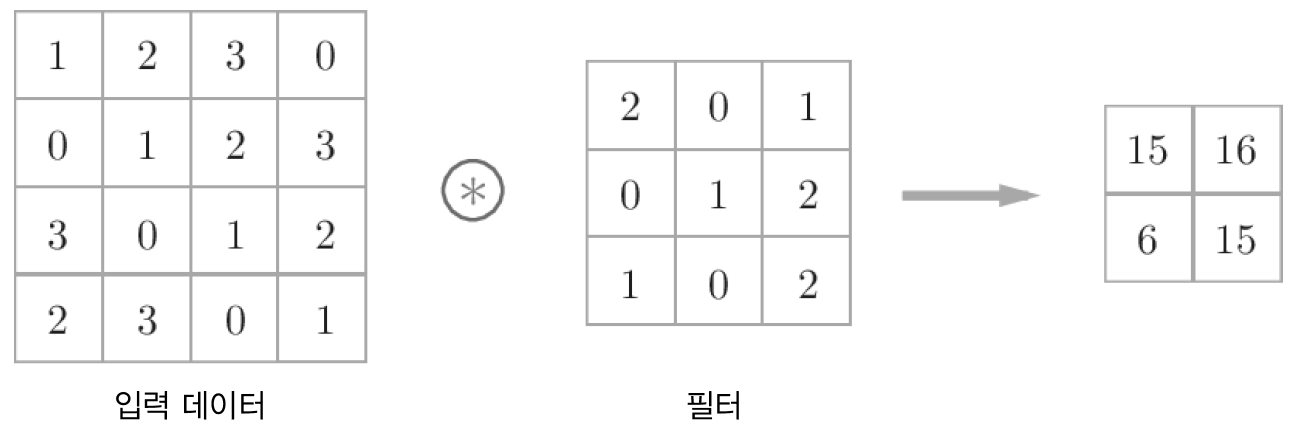

- 합성곱 연산은 입력 데이터에 필터(= 커널)를 적용하여 연산한다
- 예시 : 입력데이터는 세로,가로 방향의 형상가짐 (필터도 마찬가지)
- 입력이 (4,4), 필터는 (3,3), 출력은 (2,2).


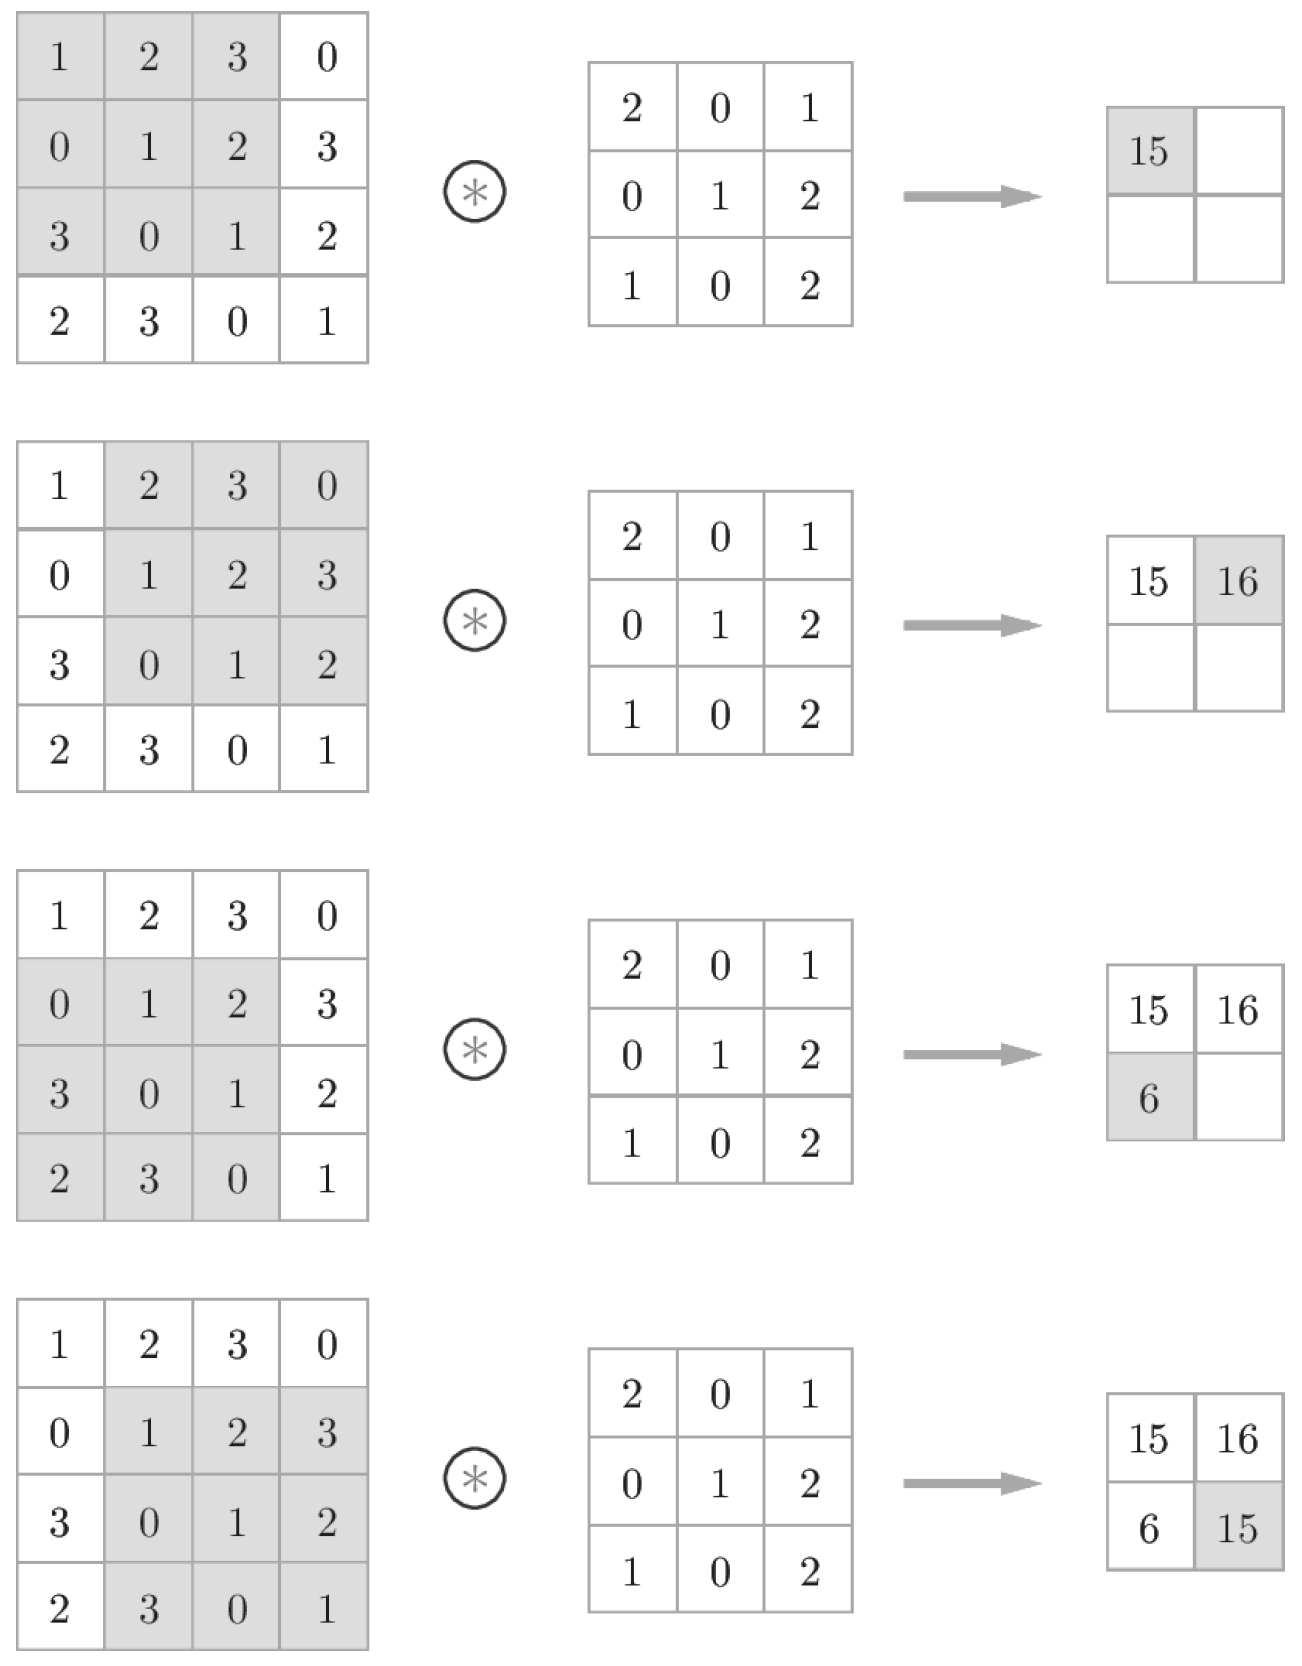

이렇게 필터가 이미지를 돌면서 필터에 대응하는 원소끼리 곱하고 그 합을 출력한다

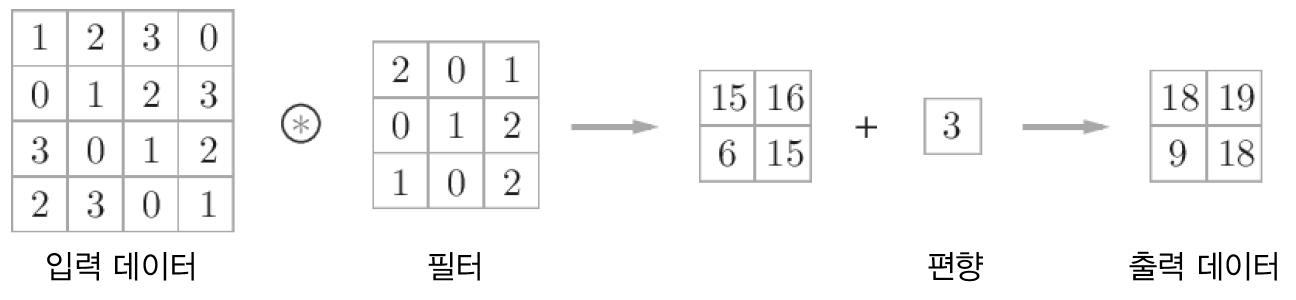

편향은 필터를 적용한 후의 데이터에 더해지며, 항상 하나(1x1)만 존재한다

### 7.2.3 패딩

- 합성곱 연산을 수행하기 전에 입력 데이터 주변을 0같은 특정값으로 채우는 것을 **패딩**이라 한다
- 패딩은 주로 출력 크기를 조절하기 위해 사용된다.

  => 패딩을 사용하면 입력 데이터의 공간적 크기를 고정한 채 다음 계층으로 전달할 수 있다

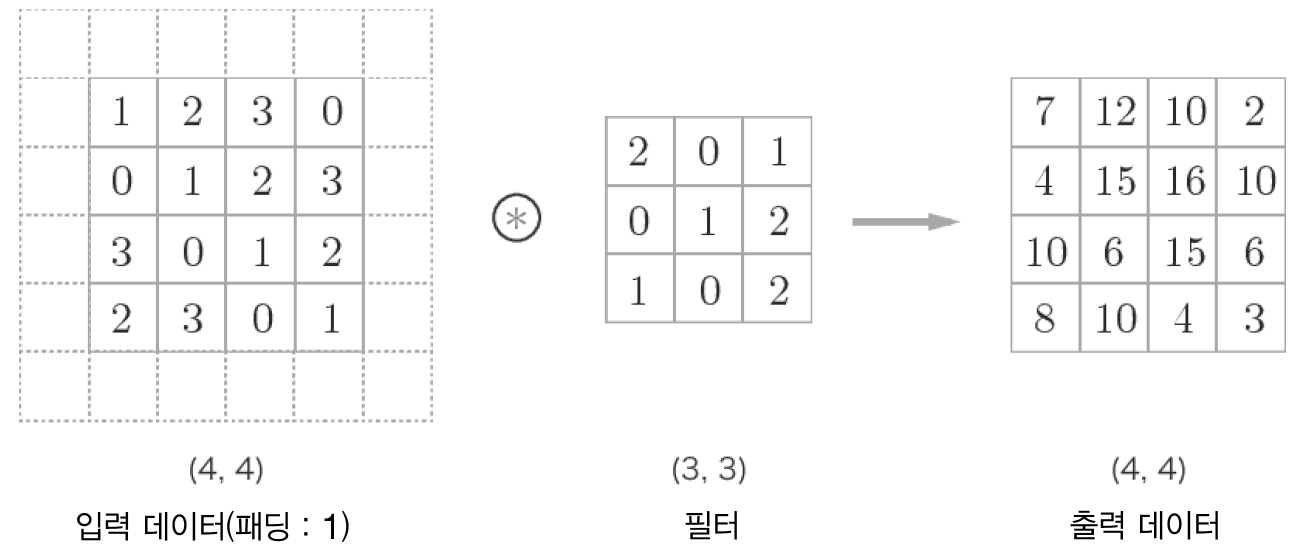

### 7.2.4 스트라이드

- 스트라이드 : 필터를 적용하는 위치의 간격

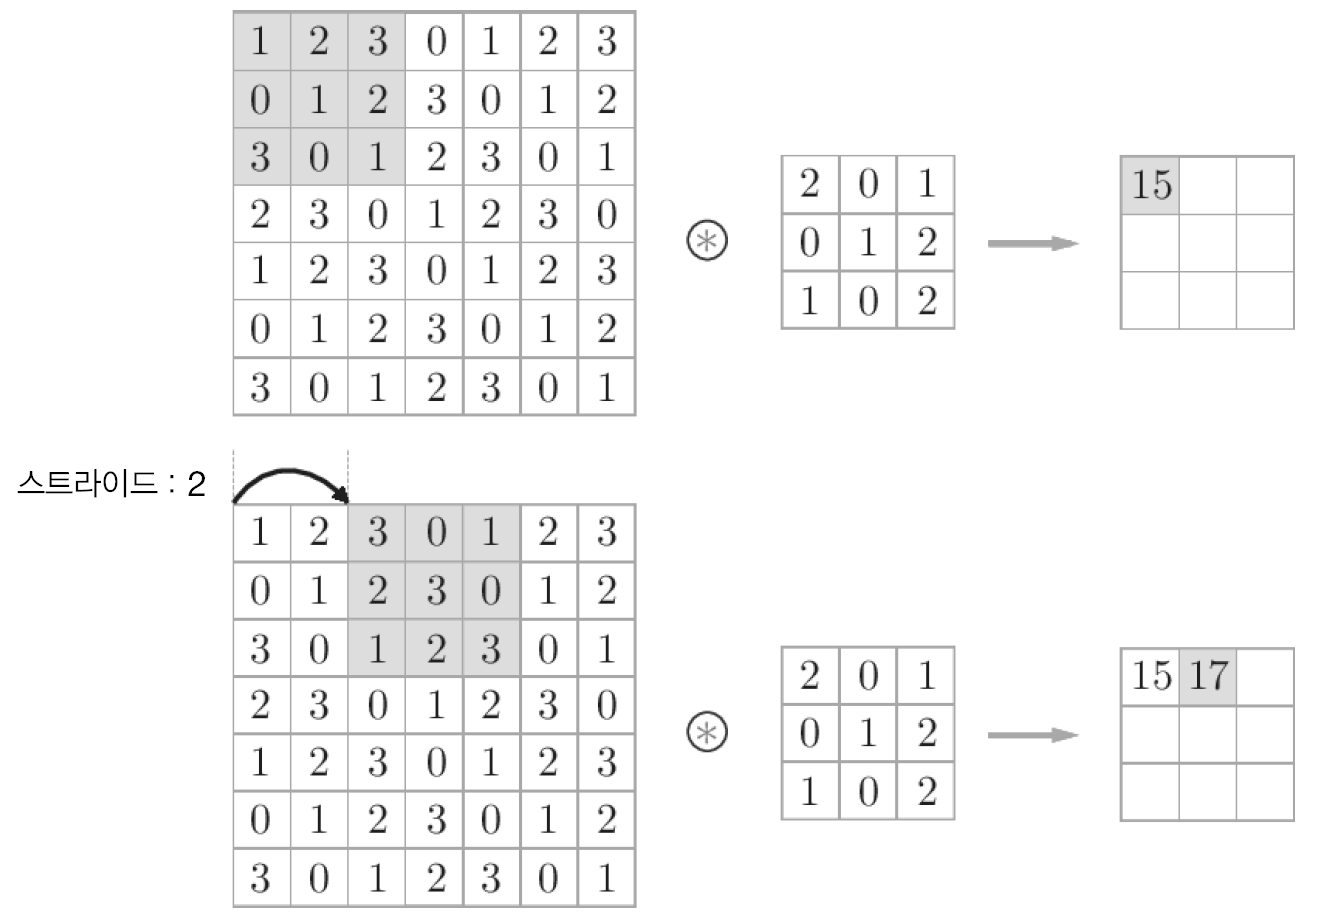

- 스트라이드를 키우면 출력크기는 작아진다

> 패딩, 스트라이드, 출력크기의 관계 수식화

입력크기(H,W) / 필터크기(FH, FW) / 출력크기(OH, OW) / 패딩 P / 스트라이드 S

OH = [ (H+2P-FH)/S ] + 1

OW = [ (W+2P-FW)/S ] + 1

수식들은 정수로 나눠떨어지는 값이어야 한다

### 7.2.5 3차원 데이터의 합성곱 연산

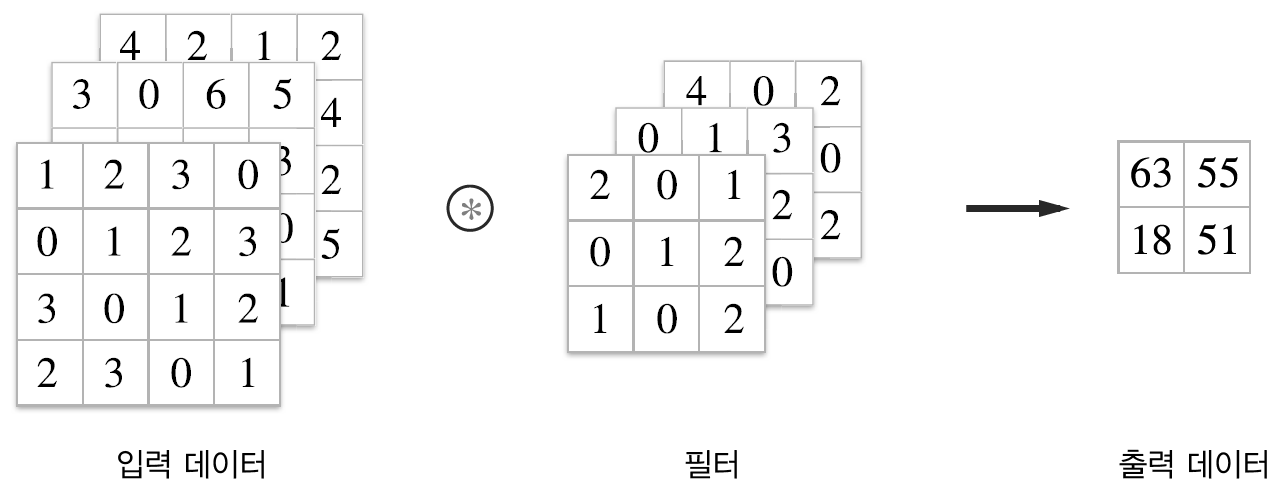

- 채널 쪽으로 특징 맵이 여러 개 있을 때 입력데이터와 필터의 합성곱 연산을 채널마다 수행하고 연산수행 결과 더해서 출력을 얻는다
- 여기서 주의할 점은 **입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것**이다



### 7.2.6 블록으로 생각하기

- 3차원 직육면체로 생각하면 이해하는데 도움이 된다

- 3차원 데이터를 배열로 나타낼 때는 채널, 높이, 너비 순서 (C, H, W) / 필터 (C, FH, FW)
- 출력데이터는 한 장의 특징 맵 : 다수의 채널을 내보내려면 필터를 다수 사용

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fcign8n%2Fbtq4rzyeVtw%2FvtkSDCy9qhQ2ahcai5fiIk%2Fimg.png)

<br/>

합성곱 연산에 편향까지 표현하면 아래와 같다

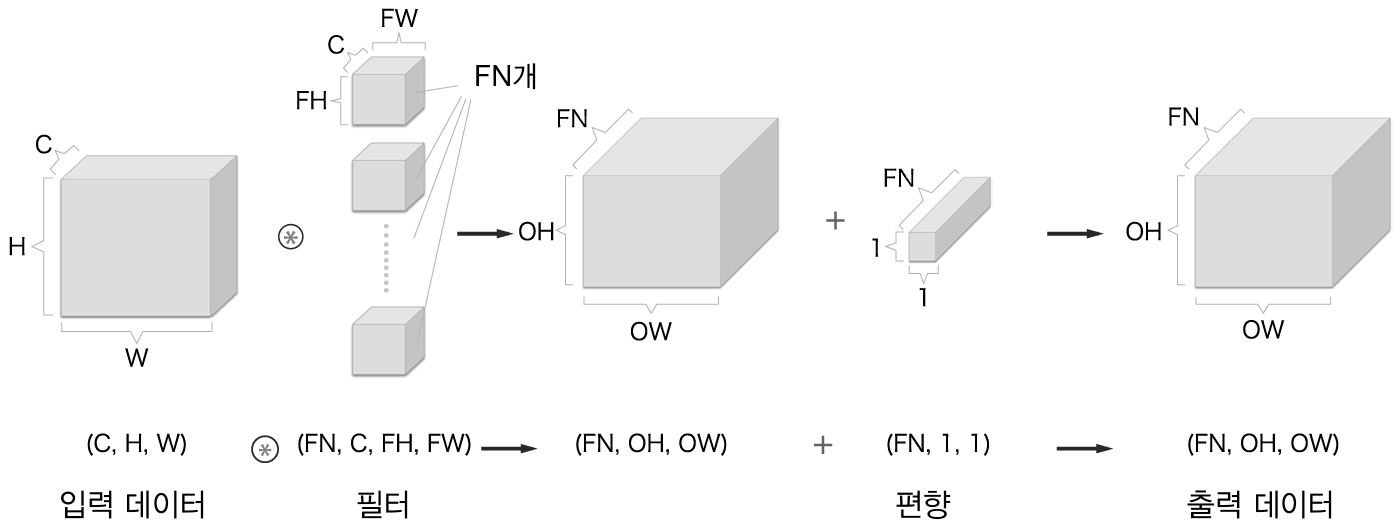



### 7.2.7 배치 처리

- 배치 사이즈를 추가하여 4차원의 데이터를 사용한다
- (batch_size, channel, heigth, width)

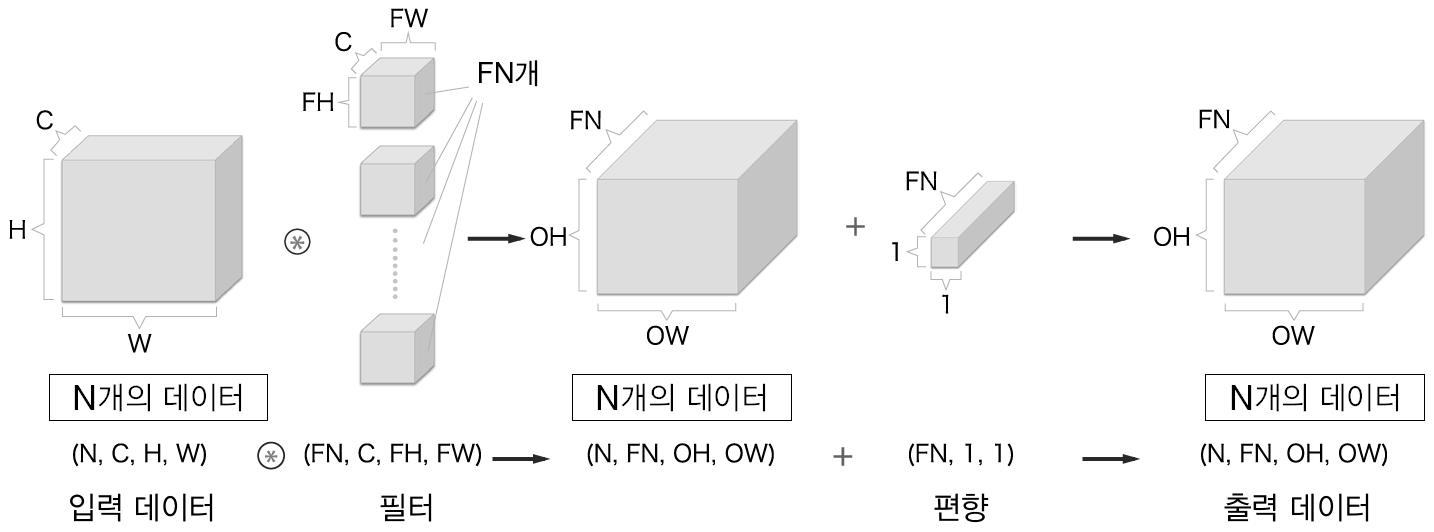


## 7.3 풀링 계층

- 세로, 가로 방향의 공간을 줄이는 연산
- 맥스 풀링(max pooling), 평균 풀링(average pooling)이 있는데 주로 맥스 풀링을 사용한다

### 7.3.1 풀링 계층의 특징

- 학습해야 할 매개변수가 없다 = 최댓값이나 평균을 구하는 계산만 한다
- 채널수가 변하지 않는다 = 풀링연산은 채널마다 독립적으로 계산하기 때문에 입력채널 그대로 출력
- 입력의 변화에 영향을 적게 받는다(강건하다) = 입력 데이터의 차이를 풀링이 흡수해 사라지게 함

## 7.4 합성곱/풀링 계층 구현하기

### 7.4.1 4차원 배열



In [ ]:
# (10, 1, 28, 28)
import numpy as np 
x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [ ]:
x[0,0].shape

(28, 28)

### 7.4.2 im2col로 데이터 전개하기

- im2col : image to column
- for문 대신 im2col함수 사용하여 간단 구현
- 3차원 데이터에 im2col 적용하면 2차원 행렬로 바뀜

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FcQEstQ%2Fbtq4p2A9Xf5%2F2bIwnz0tvv0WG7kQ3UbJj0%2Fimg.png)


<br/>

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FqoaYE%2Fbtq4rAcRyDe%2FROcxCmOrJ6SuwCZVEKbrg0%2Fimg.png)

### 7.4.3 합성곱 계층 구현하기

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 20.46 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [ ]:
%cd /content/deep-learning-from-scratch/common

/content/deep-learning-from-scratch/common


In [ ]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col 

x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10,3,7,7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)


(9, 75)
(90, 75)


In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0): # 필터(가중치), 편향, 스트라이드, 패딩
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape # 필터는 (FN = 필터개수, C = 채널, FH = 필터 높이, FW = 필터 너비)
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

        # 입력 데이터를 im2col로 전개하고 / 필터도 reshape로 2차원 배열로 전개 / 그리고 두 행렬을 곱함
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1)
        out = np.dot(col, col_W) + self.b 

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) #??? 트랜스포즈 왜 해주지???

        return out

- 왜 transpose해주지????

  => 다차원 배열의 축 순서를 바꿔준다!!! 

  => cifar100에서 데이터 전처리할때 왜 해주나 했는데 순서 바꿔주는거였구나

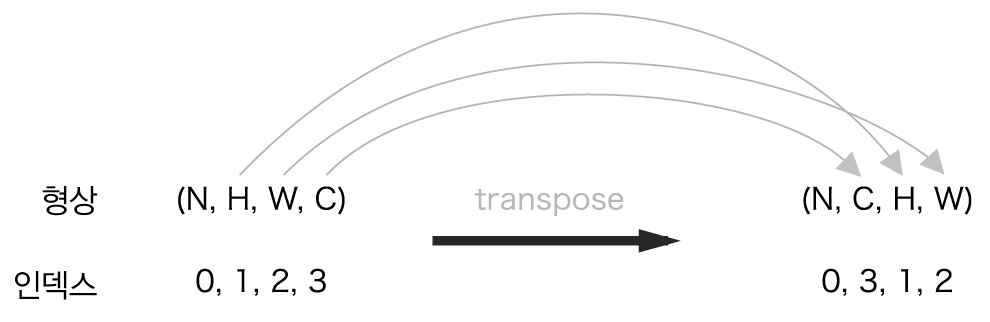

### 7.4.4 풀링 계층 구현하기

- 풀링의 경우 채널 쪽이 독립적이라는 점이 합성곱 계층과 다르다
- 계층 구현 단계

  1. 입력 데이터 전개

  2. 행별 최댓값 구하기

  3. 적절한 모양으로 성형
  

입력 데이터에 풀링 적용 영역을 전개(2x2 풀링 예시)

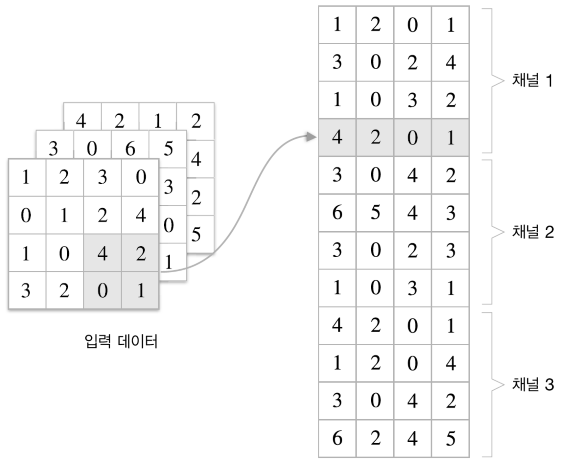

<br/>


![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FwXHG6%2Fbtq4pAq8EOI%2Fm6oFPDZJMvjAPgXNlMKSw1%2Fimg.png)

In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)

        out = np.max(col, axis=1)

        out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)

        return out

## 7.5 CNN 구현하기

In [ ]:
class SimpleConvNet:
    def __init__(self, input_dim=(1,28,28), conv_param = {'filter_num' : 30, 'filter_size' : 5, 'pad' : 0, 'stride' : 1}, 
                 hidden_size = 100, output_size = 10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h = 2, pool_w = 2, stride = 2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y,t)

    def gradient(self, x, t):
        self.loss(x,t)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers: 
            dout = layer.backward(dout)

        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db

        return grads

In [ ]:
%cd /content/deep-learning-from-scratch/ch07

/content/deep-learning-from-scratch/ch07


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 7.6 CNN 시각화하기

### 7.6.1 1번째 층의 가중치 시각화하기

- 1번째 층의 합성곱 계층의 가중치는 (30, 1, 5, 5)

  => 채널이 1개라는 것은 필터를 1채널의 회색조 이미지로 시각화 할 수 있다는 뜻

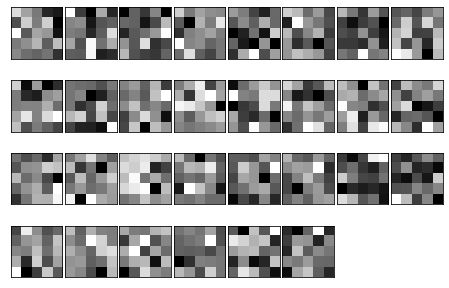

FileNotFoundError: ignored

In [ ]:
	# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
# from simple_convnet import SimpleConvNet
 
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))
 
    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
 
 
network = SimpleConvNet()
# 가중치 초기화(랜덤)
filter_show(network.params['W1'])
 
# 학습 후 가중치
network.load_params("/content/drive/MyDrive/deep-learning-from-scratch/ch07/params.pkl")
filter_show(network.params['W1'])

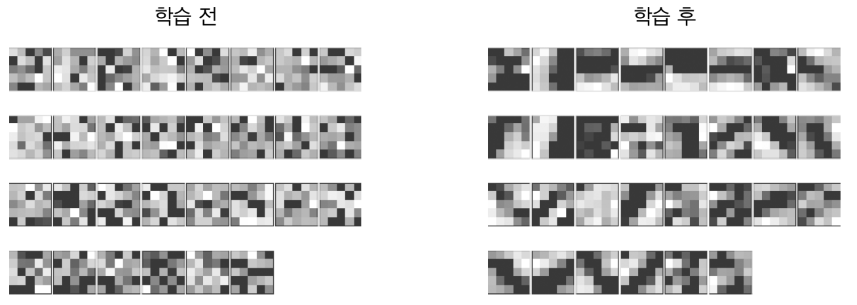

- 학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도의 규칙성이 없지만
- 학습 후 필터는 규칙성있는 이미지가 되었다.
- 규칙성있는 필터는 에지(색상이 바뀐 경계선)와 볼륨(국소적으로 덩어리진 영역) 등 보고 있다
- 합성곱 계층의 필터는 에지나 블롭 등의 원시적인 정보 추출가능, 뒤 계층에 전달한다

### 7.6.2 층 깊이에 따른 추출 정보 변화

> 겹겹이 쌓인 CNN의 각 계층에서는 어떤 정보가 추출될까???

![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FzhKvo%2Fbtq4qFenXqi%2Fwpttl8vC9vUFUTK4V31Fgk%2Fimg.png)

=> 계층이 깊어질수록 추출되는 정보는 더 추상화된다

=> 층이 깊어질수록 뉴런이 반응하는 대상이 단순한 모양에서 고급 정보로 변한다. = 사물의 의미를 이해하도록 변화한다

## 7.7 대표적인 CNN

### 7.7.1 LeNet

- 손글씨 숫자 인식 네트워크 (1998)
- 합성곱 계층과 풀링계층(단순히 원소를 줄이기만 하는 서브샘플링 계층)을 반복하고 마지막으로 완전연결계층 거치면서 결과 출력
- LeNet과 현재 CNN 비교

  1. 활성화 함수 : LeNet(sigmoid) / 현재(ReLU)
  
  2. 데이터 크기 줄이기 : LeNet(서브샘플링, 중간데이터 크기 줄임) / 현재(MaxPooling)

### 7.7.2 AlexNet

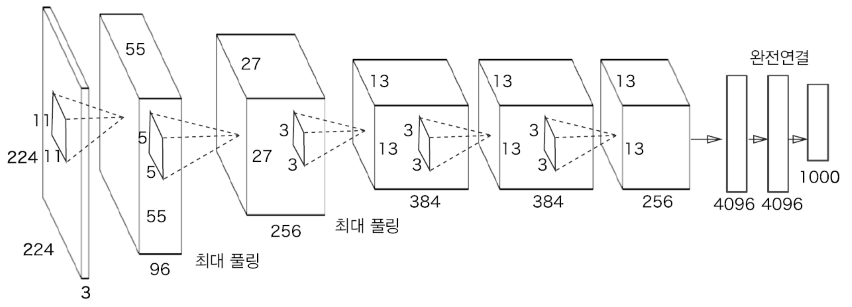

- LeNet과 비교해 바뀐 점
  
  1. 활성화 함수로 ReLU 사용

  2. LRN이라는 국소적 정규화 실시하는 계층 이용

  3. 드롭아웃 사용

  4. GPU계산 위해 병렬적인 구조로 설계

### 7.8 정리

- CNN은 완전연결 계층 네트워크에 합성곱, 풀링 계층을 새로 추가한다
- 합성곱, 풀링 계층은 im2col을 이용해 구현할 수 있다
- CNN을 시각화해보면(피쳐맵 시각화) 계층이 깊어질수록 고급 정보가 추출됨을 볼 수 있다
- 초창기 CNN에는 LeNet, AlexNet
- 빅데이터와 GPU의 발전으로 딥러닝의 도약이 일어났다